<a href="https://colab.research.google.com/github/shembree89/Coursera/blob/main/machinelearning_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-MEAN CLUSTERING

In [ ]:
import pandas as pd

In [ ]:
 url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")


In [ ]:
abalone = pd.read_csv(url, header=None)

In [ ]:
print(abalone)

      0      1      2      3       4       5       6       7   8
0     M  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.1500  15
1     M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.0700   7
2     F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.2100   9
3     M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.1550  10
4     I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.0550   7
...  ..    ...    ...    ...     ...     ...     ...     ...  ..
4172  F  0.565  0.450  0.165  0.8870  0.3700  0.2390  0.2490  11
4173  M  0.590  0.440  0.135  0.9660  0.4390  0.2145  0.2605  10
4174  M  0.600  0.475  0.205  1.1760  0.5255  0.2875  0.3080   9
4175  F  0.625  0.485  0.150  1.0945  0.5310  0.2610  0.2960  10
4176  M  0.710  0.555  0.195  1.9485  0.9455  0.3765  0.4950  12

[4177 rows x 9 columns]


In [ ]:
abalone.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
abalone.columns = [
...     "Sex",
...     "Length",
...     "Diameter",
...     "Height",
...     "Whole weight",
...     "Shucked weight",
...     "Viscera weight",
...     "Shell weight",
...     "Rings",
... ]

In [ ]:
abalone = abalone.drop("Sex", axis=1)

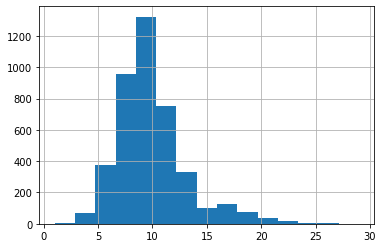

In [ ]:
import matplotlib.pyplot as plt
abalone["Rings"].hist(bins=15)
plt.show()

In [ ]:
correlation_matrix = abalone.corr()
correlation_matrix["Rings"]

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

In [ ]:
import numpy as np
a = np.array([2, 2])
b = np.array([4, 4])
np.linalg.norm(a - b)

2.8284271247461903

In [ ]:
X = abalone.drop("Rings", axis=1)
X = X.values
y = abalone["Rings"]
y = y.values

In [ ]:
new_data_point = np.array([
...     0.569552,
...     0.446407,
...     0.154437,
...     1.016849,
...     0.439051,
...     0.222526,
...     0.291208,
... ])

In [ ]:
distances = np.linalg.norm(X - new_data_point, axis=1)

In [ ]:
k = 3
nearest_neighbor_ids = distances.argsort()[:k]
nearest_neighbor_ids

array([4045, 1902, 1644])

In [ ]:
nearest_neighbor_rings = y[nearest_neighbor_ids]
nearest_neighbor_rings

array([ 9, 11, 10])

In [ ]:
prediction = nearest_neighbor_rings.mean()

In [ ]:
import scipy.stats
class_neighbors = np.array(["A", "B", "B", "C"])
scipy.stats.mode(class_neighbors)

ModeResult(mode=array(['B'], dtype='<U1'), count=array([2]))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)

In [ ]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

1.6538366794859511

In [ ]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

2.375417924000521

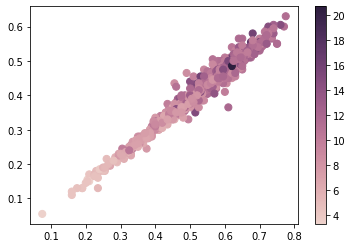

In [ ]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

DECISION TREEE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

drugTree = DecisionTreeClassifier(criterion="entropy", max_depth=4)

drugTree.fit(X_train, y_train)
predicted = drugTree.predict(X_test)

print(predicted)

print("\nDecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predicted))

[10  9 11 ...  5 10  9]

DecisionTrees's Accuracy:  0.2607655502392344


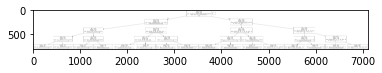

In [ ]:
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
data = tree.export_graphviz(drugTree, out_file=None)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

SUPPORT VECTOR MACHINE

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.259170653907496


In [ ]:
from sklearn import svm, datasets

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
 # avoid this ugly slicing by using a two-dim dataset
y = iris.target

In [ ]:
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear').fit(X, y)

In [ ]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

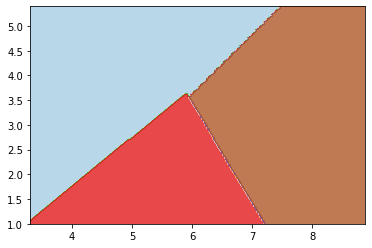

In [ ]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

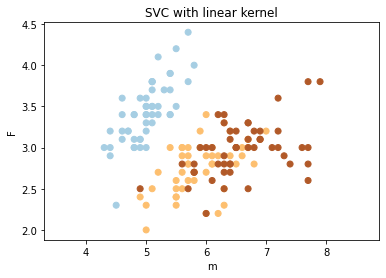

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('m')
plt.ylabel('F')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X, y)
clf.predict(X[:2, :])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([0, 0])

In [ ]:
clf.predict_proba(X[:2, :])

array([[9.81801790e-01, 1.81981959e-02, 1.43556907e-08],
       [9.71727348e-01, 2.82726221e-02, 3.00307256e-08]])

In [ ]:
clf.score(X, y)

0.9733333333333334

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

